# IRIS

In [1]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


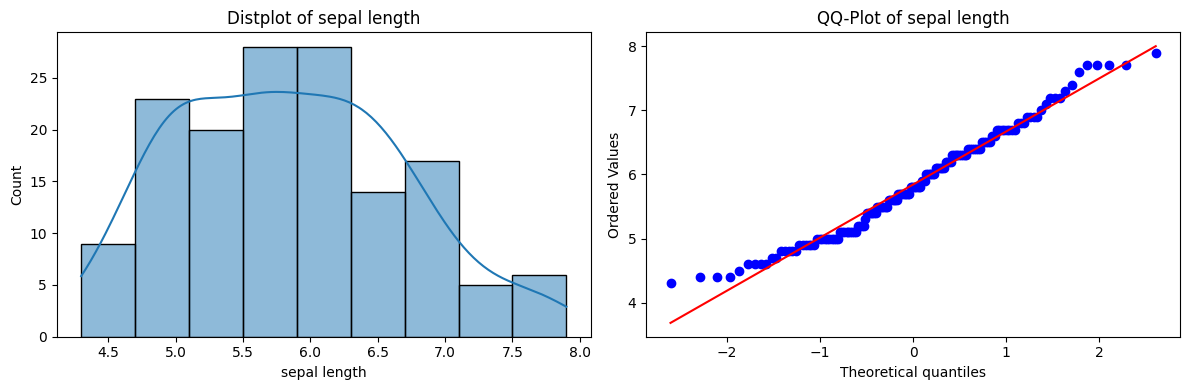

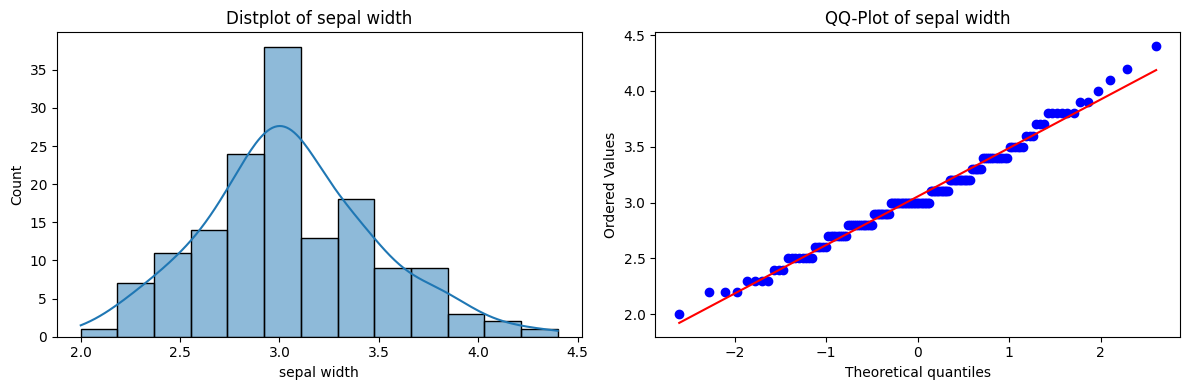

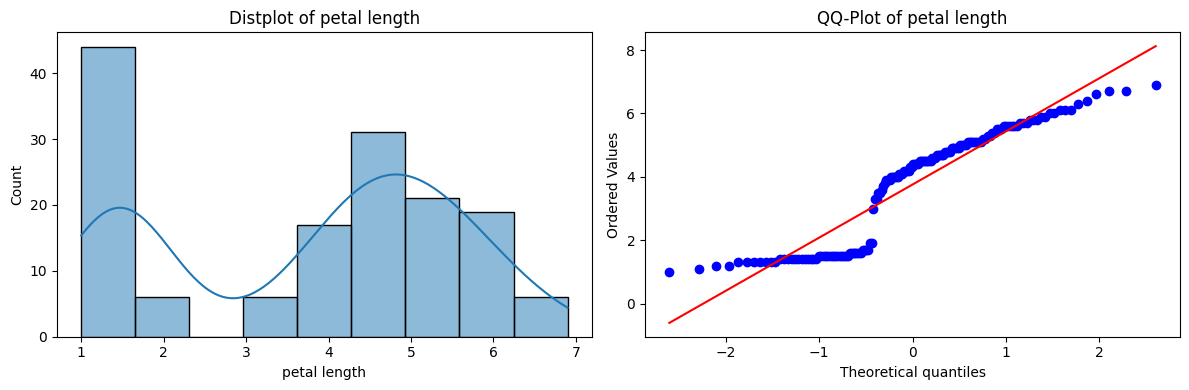

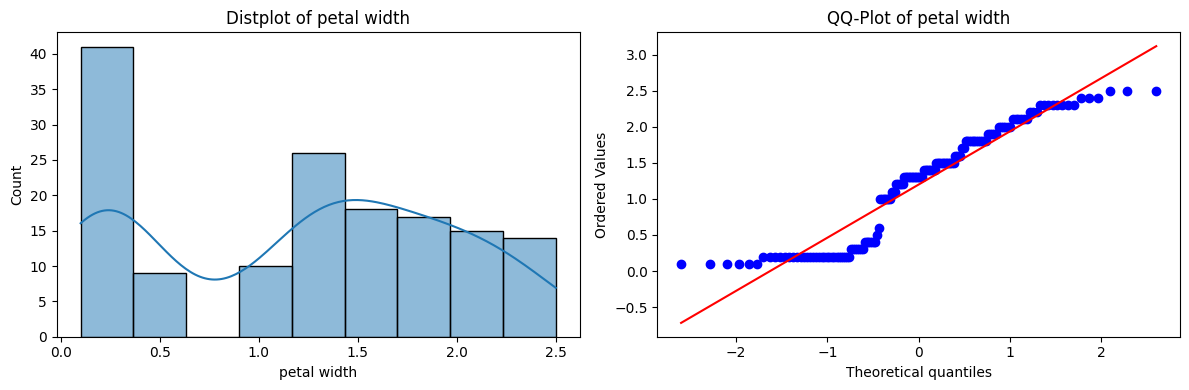

In [4]:
from scipy import stats

# Plot per ogni variabile
for column in df.iloc[:,0:-1].columns:
    plt.figure(figsize=(12, 4))

    # Histplot
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)

    plt.title(f'Distplot of {column}')

    # QQ-plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')

    plt.tight_layout()
    plt.show()

## Noi utilizziamo il dataframe importato da UCI manualmente, ma abbiamo appena vrrificato chè è lo stesso

In [6]:
# store feature matrix in "x"
X = df.drop(['class'], axis=1)
# store response vector in "y"
y = df['class']

In [7]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris_8.png',width=900,height=300)

In [10]:
#Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
print(y_test)

116     Iris-virginica
15         Iris-setosa
73     Iris-versicolor
80     Iris-versicolor
93     Iris-versicolor
51     Iris-versicolor
129     Iris-virginica
141     Iris-virginica
94     Iris-versicolor
123     Iris-virginica
12         Iris-setosa
106     Iris-virginica
69     Iris-versicolor
24         Iris-setosa
125     Iris-virginica
148     Iris-virginica
6          Iris-setosa
13         Iris-setosa
42         Iris-setosa
132     Iris-virginica
60     Iris-versicolor
68     Iris-versicolor
1          Iris-setosa
7          Iris-setosa
102     Iris-virginica
121     Iris-virginica
38         Iris-setosa
97     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
44         Iris-setosa
146     Iris-virginica
140     Iris-virginica
127     Iris-virginica
30         Iris-setosa
61     Iris-versicolor
48         Iris-setosa
103     Iris-virginica
21         Iris-setosa
31         Iris-setosa
114     Iris-virginica
53     Iris-versicolor
135     Iris-virginica
113     Iri

In [11]:
#Train the model with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

LogisticRegression()

In [12]:
model.intercept_

array([ 10.19849715,   2.21152242, -12.41001956])

In [13]:
model.coef_

array([[-0.48305407,  0.70551604, -2.3157821 , -0.92541735],
       [ 0.38501773, -0.22594691, -0.17389739, -0.68035898],
       [ 0.09803635, -0.47956913,  2.48967949,  1.60577633]])

In [14]:
X_test.iloc[0]

sepal length    6.5
sepal width     3.0
petal length    5.5
petal width     1.8
Name: 116, dtype: float64

In [15]:
## How classification work
## X_test.iloc[0]
X1 = 6.5 # sepal length
X2 = 3.0 # sepal width
X3 = 5.5 # petal length
X4 = 1.8 # petal width

x1=(10.36122821-0.47684664*X1 + 0.76508588*X2 -2.3968327*X3 -0.96721658*X4)
x2=(2.10475101+0.41151869*X1 -0.18774797*X2 -0.16175093*X3 -0.84080686*X4)
x3=(-12.46597922+0.06532795*X1 -0.57733791*X2 +2.55858363*X3 +1.80802344*X4)

p1 = 1/(1+np.exp(-x1))
p2 = 1/(1+np.exp(-x2))
p3 = 1/(1+np.exp(-x3))

prob = np.array([p1,p2,p3])

def softmax(x):
    """Applying softmax to the array x """
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

prob_normalized = softmax(prob)
prob_normalized

array([0.16713905, 0.39305027, 0.43981068])

Where p1​, p2​, and p3​ are the probabilities for each class calculated using the logistic function.

The probabilities are calculated using the sigmoid function (the logistic function) to map the output x values to a range between 0 and 1:

$$p = \frac{1}{1 + e^{-x}}$$
However, the probabilities you've computed might not sum up to 1 due to how you've calculated and normalized them. The probabilities of each class for a given observation should sum up to 1 after the application of the softmax function.

To ensure the probabilities are correctly normalized, you should apply the softmax function to the output scores x for each class:

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$
where N is the total number of classes.

The softmax function will ensure that the probabilities sum up to 1 across all classes for a given observation. This normalization is often used in multi-class classification problems

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/logisticreg.png" width="800">

In [16]:
model.predict_proba(X_test)

array([[1.51034809e-04, 1.79887037e-01, 8.19961928e-01],
       [9.78679772e-01, 2.13201452e-02, 8.24101662e-08],
       [5.42527617e-03, 8.55908879e-01, 1.38665845e-01],
       [4.85249945e-02, 9.37028937e-01, 1.44460682e-02],
       [1.78268326e-01, 8.18593170e-01, 3.13850406e-03],
       [8.66728013e-03, 8.57162121e-01, 1.34170599e-01],
       [4.04228984e-05, 1.60039260e-01, 8.39920317e-01],
       [2.56858302e-04, 1.89275014e-01, 8.10468128e-01],
       [2.33057938e-02, 9.18251195e-01, 5.84430113e-02],
       [1.32781857e-03, 4.86290000e-01, 5.12382181e-01],
       [9.73181321e-01, 2.68186053e-02, 7.38701142e-08],
       [1.25248526e-02, 6.79063719e-01, 3.08411428e-01],
       [3.96438531e-02, 9.42391139e-01, 1.79650078e-02],
       [9.46272199e-01, 5.37271644e-02, 6.36563564e-07],
       [1.30876953e-05, 6.93240072e-02, 9.30662905e-01],
       [1.47011498e-04, 8.48312118e-02, 9.15021777e-01],
       [9.83514615e-01, 1.64853167e-02, 6.86387333e-08],
       [9.90697024e-01, 9.30296

In [ ]:
# indice 2: "virginica"
# indice 1: "versicolor"
# indice 0: "setosa"

max_prob = np.array([np.argmax(element) for element in model.predict_proba(X_test)])
max_prob

array([2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2,
       2])

Il metrodo predict di LogisitiRegression(), va ad associare per ogni indice di colonna di probabilitò, la corrispondente classe:
- indice 2: "virginica"
- indice 1: "versicolor"
- indice 0: "setosa"


In [17]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


In [18]:
confronto = pd.DataFrame(data = [y_pred,y_test])
confronto = confronto.T
confronto.columns = ['predetti', 'reali_test']
confronto

,predetti,reali_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


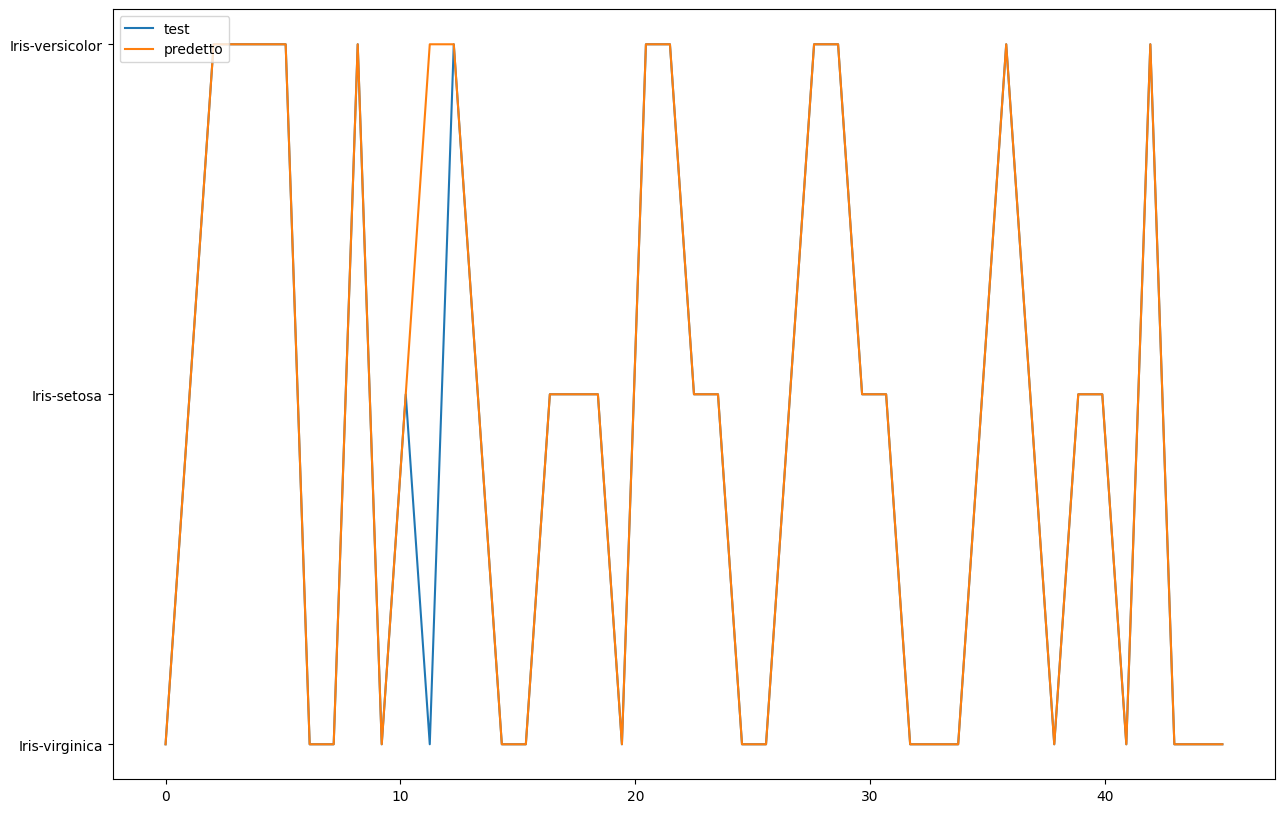

In [19]:
import numpy as np
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [20]:
model.predict([[2,3,5,2],[2,2,1,1]])

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

In [21]:
probs_y=model.predict_proba(X_test)
### Print results
probs_y = np.round(probs_y, 2)
res = "{:<15} | {:<15} | {:<15} | {:<15} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<15} | {:<15} | {:<15} | {:<15} | {:<15}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test          | y_pred          | Setosa(%)       | versicolor(%)   | virginica(%)
-----------------------------------------------------------------
Iris-virginica  | Iris-virginica  | 0.0             | 0.18            | 0.82           
Iris-setosa     | Iris-setosa     | 0.98            | 0.02            | 0.0            
Iris-versicolor | Iris-versicolor | 0.01            | 0.86            | 0.14           
Iris-versicolor | Iris-versicolor | 0.05            | 0.94            | 0.01           
Iris-versicolor | Iris-versicolor | 0.18            | 0.82            | 0.0            
Iris-versicolor | Iris-versicolor | 0.01            | 0.86            | 0.13           
Iris-virginica  | Iris-virginica  | 0.0             | 0.16            | 0.84           
Iris-virginica  | Iris-virginica  | 0.0             | 0.19            | 0.81           
Iris-versicolor | Iris-versicolor | 0.02            | 0.92            | 0.06           
Iris-virginica  | Iris-virginica  | 0.0             | 0.4

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

L'accuracy totale è: 98.0%


### save model as .PKL file

In [ ]:
import joblib

joblib.dump(model,"logistic_reg_iris.pkl")

['logistic_reg_iris.pkl']

### INFERENCE

In [ ]:
loaded_model = joblib.load("logistic_reg_iris.pkl")
loaded_model

LogisticRegression()

In [ ]:
loaded_model.predict([[3,2,1,1]])[0]

'Iris-setosa'

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 17]])

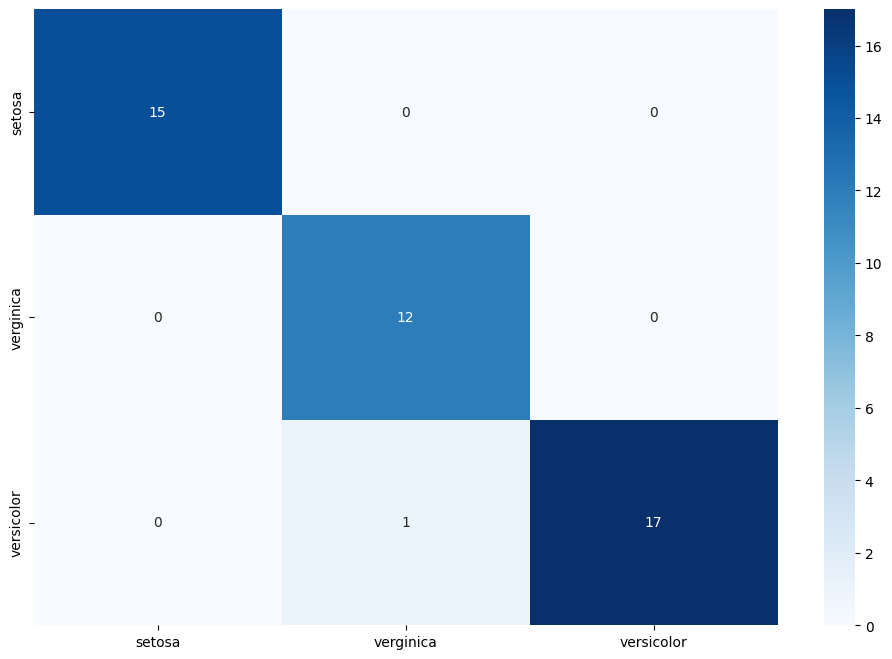

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='Blues');

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

